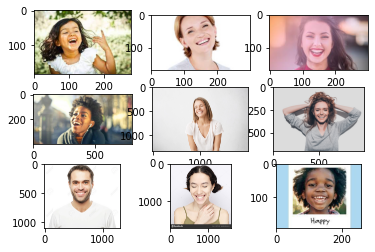

In [1]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

folder= '/content/drive/MyDrive/AI Projects/KTraGKy/CamXuc/'
for i in range(9):
  plt.subplot(330+i+1)
  filename = folder+'hanhphuc'+str(i+1)+'.jpg'
  image = imread(filename)
  plt.imshow(image)
plt.show()

Cảm xúc: Hạnh phúc, Buồn, Sợ hãi, Ghê tởm, Giận dữ, Ngạc nhiên

In [2]:
from os import listdir
from numpy import asarray
from numpy import save
from keras.preprocessing.image import load_img, img_to_array

folder= '/content/drive/MyDrive/AI Projects/KTraGKy/CamXuc/'

photos, labels = list(), list()
for file in listdir(folder):
  if file.startswith('buon'):
    output = 0
    photo = load_img(folder+file,target_size=(150,150))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('ghetom'):
    output = 1
    photo = load_img(folder+file,target_size=(150,150))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('giandu'):
    output = 2
    photo = load_img(folder+file,target_size=(150,150))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('hanhphuc'):
    output = 3
    photo = load_img(folder+file,target_size=(150,150))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('ngacnhien'):
    output = 4
    photo = load_img(folder+file,target_size=(150,150))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('sohai'):
    output = 5
    photo = load_img(folder+file,target_size=(150,150))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

photos = asarray(photos)
labels = asarray(labels)
print(photos.shape,labels.shape)

save('emotions_photos.npy', photos)
save('emotions_labels.npy', labels)

(59, 150, 150, 3) (59,)


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
from keras.models import Sequential
from keras.layers import Dense, Activation, BatchNormalization, Dropout, Conv2D, MaxPooling2D, Flatten # BatchNormalization: để dùng GPU ko lỗi

model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(150,150, 3)),
    MaxPooling2D((2, 2)),
    
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    
    Flatten(),
    Dense(64, activation='relu'),
    Dense(6, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [5]:
history = model.fit(photos, labels, epochs=20, verbose=1)

Epoch 1/20
2/2 [==============================] - 6s 339ms/step - loss: 1606.3101 - accuracy: 0.1017
Epoch 2/20
2/2 [==============================] - 0s 34ms/step - loss: 1265.1866 - accuracy: 0.1017
Epoch 3/20
2/2 [==============================] - 0s 23ms/step - loss: 484.5427 - accuracy: 0.1695
Epoch 4/20
2/2 [==============================] - 0s 22ms/step - loss: 102.9584 - accuracy: 0.2881
Epoch 5/20
2/2 [==============================] - 0s 24ms/step - loss: 62.9292 - accuracy: 0.3051
Epoch 6/20
2/2 [==============================] - 0s 23ms/step - loss: 39.1632 - accuracy: 0.4068
Epoch 7/20
2/2 [==============================] - 0s 23ms/step - loss: 18.1690 - accuracy: 0.5424
Epoch 8/20
2/2 [==============================] - 0s 36ms/step - loss: 4.7911 - accuracy: 0.6780
Epoch 9/20
2/2 [==============================] - 0s 24ms/step - loss: 1.8638 - accuracy: 0.7458
Epoch 10/20
2/2 [==============================] - 0s 31ms/step - loss: 0.2868 - accuracy: 0.9492
Epoch 11/20
2/2

In [6]:
model.save('Emotions_Final.h5')
from keras.models import load_model
models=load_model('Emotions_Final.h5')

In [7]:
classes = ["Buon","GheTom","GianDu","HanhPhuc","NgacNhien","SoHai"]

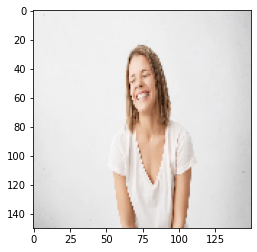

In [10]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array

img = load_img('/content/drive/MyDrive/AI Projects/KTraGKy/CamXuc/Test/hanphuc1.jpg', target_size=(150,150))
plt.imshow(img)

In [11]:
import numpy as np
imgRe = img_to_array(img)
imgRe = imgRe.reshape(1,150,150,3)  
imgRe = imgRe.astype('float32')
imgRe /= 255
y_pred = model.predict(imgRe)
print(y_pred)
y_classes = [np.argmax(element) for element in y_pred]
y_classes
classes[y_classes[0]]

[[0.16318731 0.16758347 0.1646307  0.17754334 0.16230574 0.16474944]]


'HanhPhuc'